In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.tail(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [4]:
test.tail(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0
137056,455495,6,a,6,X,3,gynecology,Q,F,4.0,126729,3.0,Trauma,Extreme,5,51-60,4702.0


In [5]:
train.columns.difference(test.columns)

Index(['Stay'], dtype='object')

In [6]:
train.shape , test.shape

((318438, 18), (137057, 17))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [9]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [10]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [11]:
test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [12]:
# Added a colums 'source'to differentiate the data from each set while combining together

In [13]:
train['source'] = 'train'
test['source'] = 'test'

In [14]:
train[:5]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [15]:
df = pd.concat([train, test])
df[:3]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train


In [16]:
df.shape

(455495, 19)

In [17]:
df['City_Code_Patient'].nunique()

37

In [18]:
df['Bed Grade'].nunique()

4

In [19]:
df.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
source                                    0
dtype: int64

In [20]:
df['Age'] = df['Age'].map({'0-10': 5,
                          '11-20': 15,
                          '21-30': 25,
                          '31-40': 35,
                          '41-50': 45,
                          '51-60': 55,
                          '61-70': 65,
                          '71-80': 75,
                          '81-90': 85,
                          '91-100': 95
                         })

In [21]:
df['Severity of Illness'] = df['Severity of Illness'].map({'Minor': 1,
                          'Moderate': 2,
                          'Extreme': 3})

In [22]:
hospital_type ={
 'a': 0,
 'b': 1,
 'c': 2,
 'e': 3,
 'd': 4,
 'f': 5,
 'g': 6} 

hospital_region = {'X': 0, 'Y': 1, 'Z': 2}

dep ={'gynecology': 0,
 'anesthesia': 1,
 'radiotherapy': 2,
 'TB & Chest disease': 3,
 'surgery': 4}

ward_type ={'R': 0, 'Q': 1, 'S': 2, 'P': 3, 'T': 4, 'U': 5}
ward_fac ={'F':0, 'E': 1, 'D':2, 'C': 3, 'B': 4, 'A': 5}
admiss = {'Trauma': 0, 'Emergency': 1, 'Urgent': 2}
stay = {'21-30': 2,
 '11-20': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 'More than 100 Days': 10,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}

In [23]:
df['Hospital_type_code'] = df['Hospital_type_code'].map(hospital_type)
df['Hospital_region_code'] = df['Hospital_region_code'].map(hospital_region)
df['Department'] = df['Department'].map(dep)
df['Ward_Type'] = df['Ward_Type'].map(ward_type)
df['Ward_Facility_Code'] = df['Ward_Facility_Code'].map(ward_fac)
df['Type of Admission'] = df['Type of Admission'].map(admiss)
df['Stay'] = df['Stay'].map(stay)

In [24]:
df.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
source                                    0
dtype: int64

In [25]:
df['Bed Grade'].fillna(value=df['Bed Grade'].mean(),inplace=True)

In [26]:
df['City_Code_Patient'].fillna(value=df['City_Code_Patient'].mean(),inplace=True)

In [27]:
df.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                 0
patientid                                 0
City_Code_Patient                         0
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
source                                    0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

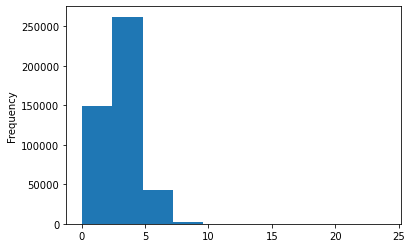

In [28]:
df['Available Extra Rooms in Hospital'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

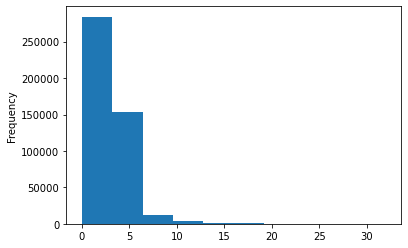

In [29]:
df['Visitors with Patient'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

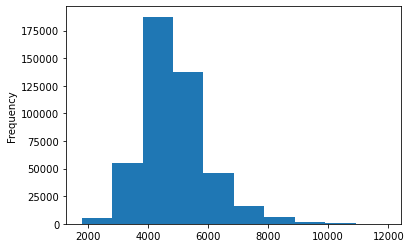

In [30]:
df['Admission_Deposit'].plot(kind='hist')

In [31]:
df.corr()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,1.000000,-0.024139,0.002979,-0.008247,0.004225,0.023878,-0.010093,-0.003603,0.006141,0.011753,-0.000235,0.037785,0.080216,-0.087231,0.000818,-0.066957,-0.029820,-0.053882
Hospital_code,-0.024139,1.000000,-0.003576,0.127760,-0.136023,-0.058744,0.014140,0.010903,0.131275,-0.014996,0.002912,-0.015150,-0.004176,0.029914,-0.028168,0.017573,0.046347,0.042846
Hospital_type_code,0.002979,-0.003576,1.000000,0.100281,0.370594,-0.095428,-0.024902,0.227275,0.292326,0.014380,-0.003135,0.067308,-0.005217,0.006742,-0.039897,0.000566,0.033260,0.063427
City_Code_Hospital,-0.008247,0.127760,0.100281,1.000000,0.006217,-0.045313,-0.009152,-0.040753,0.097786,-0.048422,0.001617,-0.024968,0.030233,0.025952,0.018377,0.022641,-0.034767,0.006381
Hospital_region_code,0.004225,-0.136023,0.370594,0.006217,1.000000,-0.006600,-0.023298,0.196641,0.509033,-0.042485,-0.001616,0.148049,0.056018,0.029171,-0.021113,-0.016980,0.076084,0.011905
Available Extra Rooms in Hospital,0.023878,-0.058744,-0.095428,-0.045313,-0.006600,1.000000,-0.086857,-0.050479,-0.048277,-0.115288,0.001551,-0.008649,0.039490,-0.004505,0.095790,-0.131132,-0.143479,-0.121120
Department,-0.010093,0.014140,-0.024902,-0.009152,-0.023298,-0.086857,1.000000,0.015146,-0.014877,0.054596,0.004448,0.000194,-0.016792,0.037364,0.009141,0.071377,0.085835,0.000278
Ward_Type,-0.003603,0.010903,0.227275,-0.040753,0.196641,-0.050479,0.015146,1.000000,0.218468,-0.018997,-0.001769,0.071875,0.033976,0.024101,0.054558,0.011091,-0.023968,0.090936
Ward_Facility_Code,0.006141,0.131275,0.292326,0.097786,0.509033,-0.048277,-0.014877,0.218468,1.000000,-0.076119,-0.000811,0.137681,0.065078,0.035291,-0.024108,0.000863,0.023271,0.004552
Bed Grade,0.011753,-0.014996,0.014380,-0.048422,-0.042485,-0.115288,0.054596,-0.018997,-0.076119,1.000000,0.000579,-0.006995,-0.049033,-0.283539,0.089351,0.000045,0.071697,0.025737


<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='Hospital_region_code'>

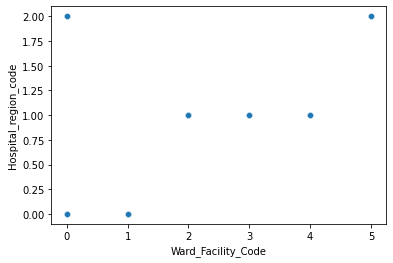

In [32]:
sns.scatterplot(df['Ward_Facility_Code'], df['Hospital_region_code'])

<AxesSubplot:ylabel='Density'>

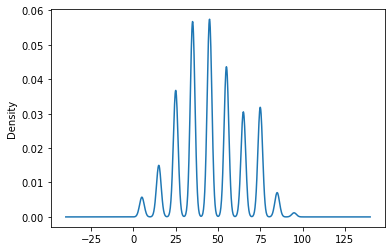

In [33]:
df['Age'].plot.kde()

<AxesSubplot:xlabel='Severity of Illness', ylabel='Density'>

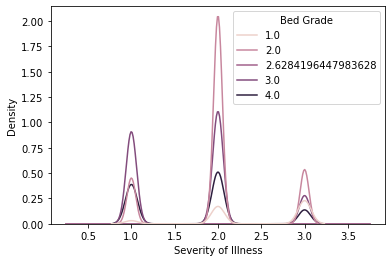

In [34]:
sns.kdeplot(df['Severity of Illness'],hue = df['Bed Grade'])

<AxesSubplot:xlabel='Department', ylabel='Density'>

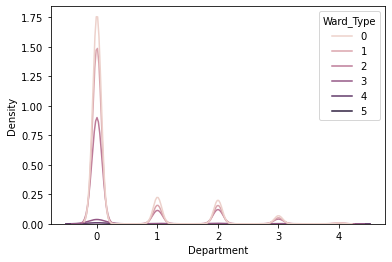

In [35]:
sns.kdeplot(df['Department'],hue = df['Ward_Type'])

<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='Density'>

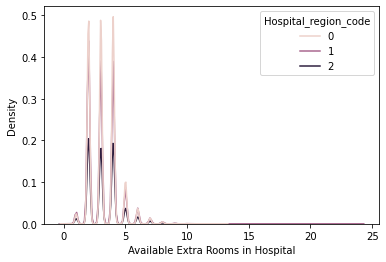

In [36]:
sns.kdeplot(df['Available Extra Rooms in Hospital'],hue = df['Hospital_region_code'])

<AxesSubplot:xlabel='City_Code_Patient', ylabel='City_Code_Hospital'>

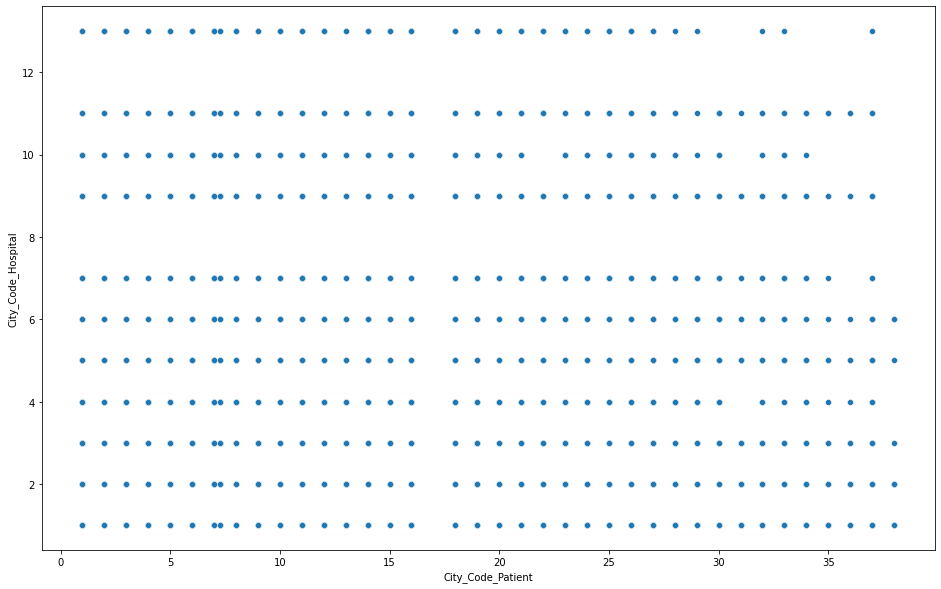

In [37]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = df['City_Code_Patient'], y = df['City_Code_Hospital'])

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Visitors with Patient'>

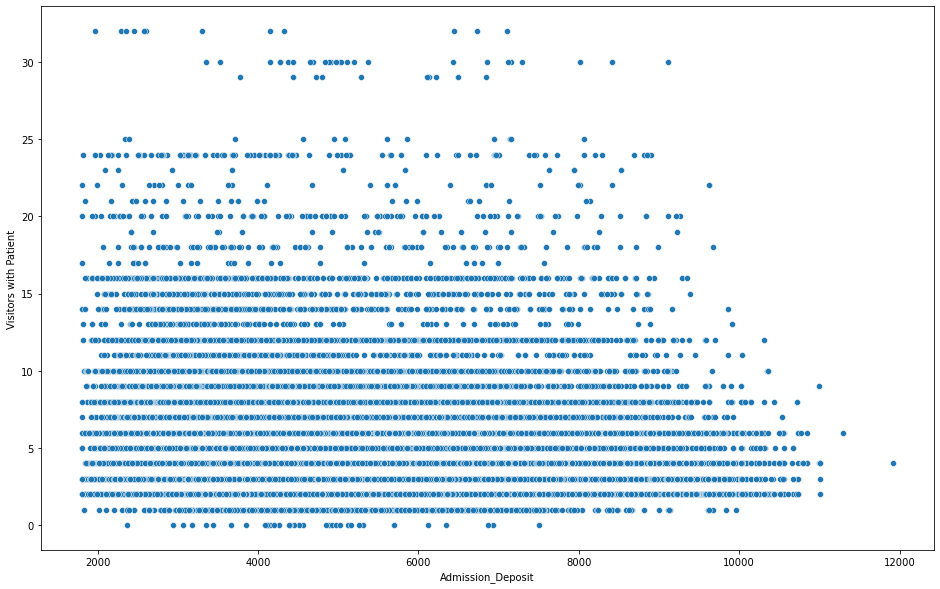

In [38]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = df['Admission_Deposit'], y = df['Visitors with Patient'])

<AxesSubplot:xlabel='City_Code_Patient', ylabel='Density'>

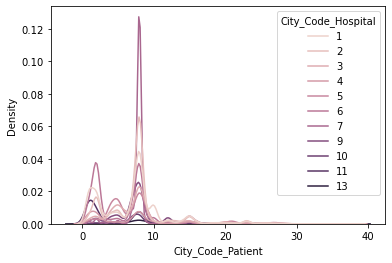

In [39]:
sns.kdeplot(df['City_Code_Patient'],hue = df['City_Code_Hospital'])

<AxesSubplot:xlabel='Visitors with Patient', ylabel='Density'>

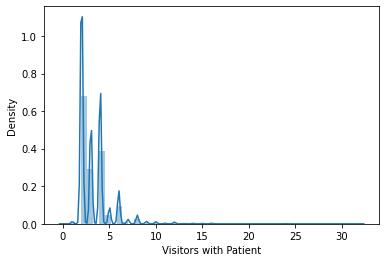

In [40]:
sns.distplot(df['Visitors with Patient'])

In [41]:
X = df.select_dtypes(include=np.number).drop(columns=['Stay'])

In [42]:
X[:4]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,1,8,2,3,2,3,2,0,0,2.0,31397,7.0,1,3,2,55,4911.0
1,2,2,2,5,2,2,2,2,0,2.0,31397,7.0,0,3,2,55,5954.0
2,3,10,3,1,0,2,1,2,1,2.0,31397,7.0,0,3,2,55,4745.0
3,4,26,1,2,1,2,2,0,2,2.0,31397,7.0,0,3,2,55,7272.0


In [43]:
X.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [44]:
vif_data = pd.DataFrame()

In [45]:
vif_data

""


In [46]:
vif_data['Feature'] = X.columns

In [47]:
vif_data

,Feature
0,case_id
1,Hospital_code
2,Hospital_type_code
3,City_Code_Hospital
4,Hospital_region_code
5,Available Extra Rooms in Hospital
6,Department
7,Ward_Type
8,Ward_Facility_Code
9,Bed Grade


In [48]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [49]:
vif_data

,Feature,VIF
0,case_id,3.869239
1,Hospital_code,5.822345
2,Hospital_type_code,2.068045
3,City_Code_Hospital,3.417039
4,Hospital_region_code,3.255750
5,Available Extra Rooms in Hospital,7.407734
6,Department,1.252039
7,Ward_Type,2.262505
8,Ward_Facility_Code,3.035097
9,Bed Grade,9.301825


In [50]:
df_number_columns = df.select_dtypes(include=np.number).columns

In [51]:
df_number_columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [52]:
df_category_columns = df.select_dtypes(exclude=np.number).columns

In [53]:
df_category_columns

Index(['source'], dtype='object')

In [54]:
data_to_encode = df[df_category_columns].drop(columns = ['source'] )

In [55]:
data_to_encode[:3]

""
0
1
2


In [56]:
df_final = pd.concat([data_to_encode, df[df_number_columns], 
                      df[['source']]], axis = 1)

In [57]:
df_final.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,2,3,2,3,2,0,0,2.0,31397,7.0,1,3,2,55,4911.0,0.0,train
1,2,2,2,5,2,2,2,2,0,2.0,31397,7.0,0,3,2,55,5954.0,4.0,train
2,3,10,3,1,0,2,1,2,1,2.0,31397,7.0,0,3,2,55,4745.0,3.0,train
3,4,26,1,2,1,2,2,0,2,2.0,31397,7.0,0,3,2,55,7272.0,4.0,train
4,5,26,1,2,1,2,2,2,2,2.0,31397,7.0,0,3,2,55,5558.0,4.0,train


In [58]:
train_preprocessed = df[df['source'] == 'train']
test_preprocessed = df[df['source'] == 'test']

In [59]:
train_preprocessed.shape, test_preprocessed.shape

((318438, 19), (137057, 19))

In [60]:
del train_preprocessed['source']
train_preprocessed.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,2,0,0,2.0,31397,7.0,1,3,2,55,4911.0,0.0
1,2,2,2,5,2,2,2,2,0,2.0,31397,7.0,0,3,2,55,5954.0,4.0
2,3,10,3,1,0,2,1,2,1,2.0,31397,7.0,0,3,2,55,4745.0,3.0
3,4,26,1,2,1,2,2,0,2,2.0,31397,7.0,0,3,2,55,7272.0,4.0
4,5,26,1,2,1,2,2,2,2,2.0,31397,7.0,0,3,2,55,5558.0,4.0


In [61]:
del test_preprocessed['source']
test_preprocessed.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,318439,21,2,3,2,3,0,2,5,2.0,17006,2.0,1,2,2,75,3095.0,NaN
1,318440,29,0,4,0,2,0,2,0,2.0,17006,2.0,0,2,4,75,4018.0,NaN
2,318441,26,1,2,1,3,0,1,2,4.0,17006,2.0,1,2,3,75,4492.0,NaN
3,318442,6,0,6,0,3,0,1,0,2.0,17006,2.0,0,2,3,75,4173.0,NaN
4,318443,28,1,11,0,2,0,0,0,2.0,17006,2.0,0,2,4,75,4161.0,NaN


In [62]:
train_X = train_preprocessed.drop(columns=['case_id', 'Stay'])

In [63]:
test_X = test_preprocessed.drop(columns=['case_id', 'Stay'])

In [64]:
train_y = train_preprocessed['Stay']

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [66]:
lm = LinearRegression()
lm.fit(train_X, train_y)
pred_train = lm.predict(train_X)
pred_test = lm.predict(test_X)
pred_test = abs(pred_test)
print('MAE: ', mean_absolute_error(train_y, pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(train_y, pred_train)))
print('R-squared: ', r2_score(train_y, pred_train))

MAE:  1.2937514300865227
RMSE:  1.7423598204943358
R-squared:  0.34329582872159103


In [67]:
sample = pd.read_csv("sample_submission_lfbv3c3.csv")

In [68]:
sample['Stay'] = pred_test
from sklearn.model_selection import cross_val_score

In [69]:
def run_model(model, train_X, train_y, test_X, sample, filename):
    model.fit(train_X, train_y)
    pd.Series(model.coef_, index =test_X.columns).plot(kind = 'bar')
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print('MAE: ', mean_absolute_error(train_y, pred_train))
    cv_score = cross_val_score(model, train_X, train_y, cv = 10, scoring = 'neg_mean_absolute_error')
    print('CV score: ', np.mean(np.abs(cv_score)))
    print('R-squared: ', r2_score(train_y, pred_train))
    sample['Item_Outlet_Sales'] = pred_test
#     sample.to_csv(filename, index = False)
    sample.head()

MAE:  1.2937514300865227
CV score:  1.2945727196857848
R-squared:  0.34329582872159103


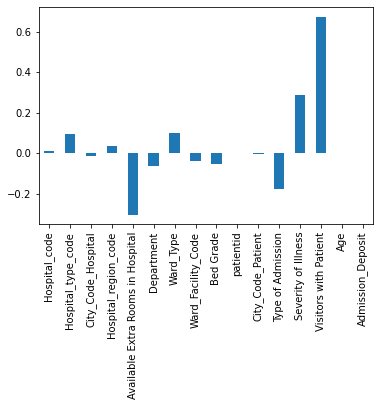

In [70]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE:  1.6124670320005488
CV score:  1.6134438753886726
R-squared:  0.0025482058742226643


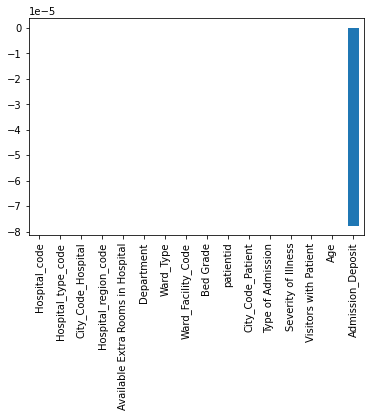

In [71]:
model = Lasso(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE:  1.2937510122773759
CV score:  1.2945722644397564
R-squared:  0.34329582777085166


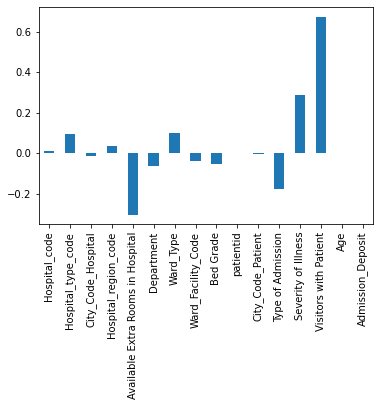

In [72]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')


MAE:  1.3699347500979593
CV score:  1.3710333775012233
R-squared:  0.25888560464179267


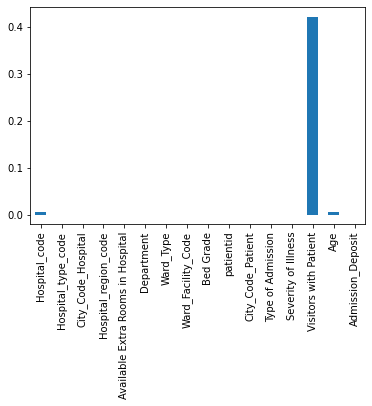

In [73]:
model = ElasticNet(alpha = 1, l1_ratio=0.5)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

In [74]:
sc = StandardScaler()

In [75]:
y = train_preprocessed['Stay']

In [76]:
X = train_preprocessed.drop('Stay', axis=1)

In [77]:
X[:3]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,1,8,2,3,2,3,2,0,0,2.0,31397,7.0,1,3,2,55,4911.0
1,2,2,2,5,2,2,2,2,0,2.0,31397,7.0,0,3,2,55,5954.0
2,3,10,3,1,0,2,1,2,1,2.0,31397,7.0,0,3,2,55,4745.0


In [78]:
y[:3]

0    0.0
1    4.0
2    3.0
Name: Stay, dtype: float64

In [79]:
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [81]:
def metrics(y_true, y_pred):
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RSME:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2 Score:', r2_score(y_true, y_pred))
    
def predictions(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    test_pred = model.predict(X_test)
    
    actual = [y_train, y_test]
    
    pred = [train_pred, test_pred]
    
    data = ['Train', 'Test']
    
    for i in range(2):
        
        print(data[i],'\n')
        
        metrics(actual[i], pred[i])

In [82]:
lr = LinearRegression()
predictions(lr)

Train 

MAE: 1.293167886614316
MSE: 3.0298461459418173
RSME: 1.7406453245683962
R2 Score: 0.3440763436575899
Test 

MAE: 1.293037267119617
MSE: 3.042342559597863
RSME: 1.7442312230888033
R2 Score: 0.34307856998519193


In [83]:
ls = Lasso()
predictions(ls)

Train 

MAE: 1.4128595859707234
MSE: 3.5873199061100225
RSME: 1.8940221503747052
R2 Score: 0.22339027265882083
Test 

MAE: 1.4139400577493162
MSE: 3.59470854035648
RSME: 1.8959716612746298
R2 Score: 0.22380828964587152


In [84]:
ri = Ridge()
predictions(ri)

Train 

MAE: 1.2931678678643919
MSE: 3.0298461459515793
RSME: 1.7406453245712004
R2 Score: 0.34407634365547657
Test 

MAE: 1.2930372455804526
MSE: 3.042342556425342
RSME: 1.744231222179371
R2 Score: 0.3430785706702223


In [85]:
el = ElasticNet()
predictions(el)

Train 

MAE: 1.3706634940060125
MSE: 3.4147627874266675
RSME: 1.8479076782747204
R2 Score: 0.26074672271035126
Test 

MAE: 1.371561819139702
MSE: 3.421919916044641
RSME: 1.8498432139088548
R2 Score: 0.2611178785398415


In [86]:
knn = KNeighborsRegressor()

predictions(knn)

Train 

MAE: 1.3284927278763246
MSE: 3.211205261410639
RSME: 1.7919836108097191
R2 Score: 0.304814371795201
Test 

MAE: 1.648053008416028
MSE: 4.940495331407277
RSME: 2.2227225043642487
R2 Score: -0.06678232135652218


In [87]:
bag = BaggingRegressor()
predictions(bag)

Train 

MAE: 0.4653670156927135
MSE: 0.4656260037863493
RSME: 0.6823679387151401
R2 Score: 0.89919781527497
Test 

MAE: 1.1807572331784115
MSE: 2.626109889879831
RSME: 1.620527657857104
R2 Score: 0.432954103477447


In [88]:
cat = CatBoostRegressor()
predictions(cat)

Learning rate set to 0.10218
0:	learn: 2.0662967	total: 422ms	remaining: 7m 1s
1:	learn: 1.9969760	total: 529ms	remaining: 4m 24s
2:	learn: 1.9392746	total: 600ms	remaining: 3m 19s
3:	learn: 1.8905108	total: 667ms	remaining: 2m 45s
4:	learn: 1.8511087	total: 739ms	remaining: 2m 27s
5:	learn: 1.8178481	total: 815ms	remaining: 2m 14s
6:	learn: 1.7850837	total: 886ms	remaining: 2m 5s
7:	learn: 1.7612028	total: 956ms	remaining: 1m 58s
8:	learn: 1.7412420	total: 1.04s	remaining: 1m 54s
9:	learn: 1.7204088	total: 1.11s	remaining: 1m 49s
10:	learn: 1.7034243	total: 1.17s	remaining: 1m 45s
11:	learn: 1.6893074	total: 1.24s	remaining: 1m 42s
12:	learn: 1.6767084	total: 1.31s	remaining: 1m 39s
13:	learn: 1.6678422	total: 1.38s	remaining: 1m 37s
14:	learn: 1.6593599	total: 1.46s	remaining: 1m 35s
15:	learn: 1.6526424	total: 1.52s	remaining: 1m 33s
16:	learn: 1.6463504	total: 1.59s	remaining: 1m 32s
17:	learn: 1.6394484	total: 1.66s	remaining: 1m 30s
18:	learn: 1.6345618	total: 1.73s	remaining: 1m

In [89]:
from sklearn.ensemble import VotingRegressor

In [90]:
estimators = [('cat', cat), ('el', el)]

In [91]:
vote = VotingRegressor(estimators=estimators, n_jobs=-1)

In [92]:
predictions(vote)

Train 

MAE: 1.1685463017780278
MSE: 2.522639475304624
RSME: 1.588281925636826
R2 Score: 0.4538802207855466
Test 

MAE: 1.1842508284595032
MSE: 2.6069199297720727
RSME: 1.614595902934252
R2 Score: 0.4370977184021194


In [94]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,2,3,2,3,2,0,0,2.0,31397,7.0,1,3,2,55,4911.0,0.0,train
1,2,2,2,5,2,2,2,2,0,2.0,31397,7.0,0,3,2,55,5954.0,4.0,train
2,3,10,3,1,0,2,1,2,1,2.0,31397,7.0,0,3,2,55,4745.0,3.0,train
3,4,26,1,2,1,2,2,0,2,2.0,31397,7.0,0,3,2,55,7272.0,4.0,train
4,5,26,1,2,1,2,2,2,2,2.0,31397,7.0,0,3,2,55,5558.0,4.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,1,2,1,4,1,1,2,3.0,41160,3.0,1,1,4,45,6313.0,NaN,test
137053,455492,25,3,1,0,2,2,0,1,4.0,30985,7.0,1,2,2,5,3510.0,NaN,test
137054,455493,30,2,3,2,2,1,0,5,4.0,81811,12.0,2,1,2,5,7190.0,NaN,test
137055,455494,5,0,1,0,2,1,0,1,4.0,57021,10.0,0,1,2,45,5435.0,NaN,test
